In [1]:
# import everything we need
import telfit
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from specutils import Spectrum1D
from astropy import units as u

try:
    import seaborn as sns
    sns.set_context('notebook', font_scale=1.5)
    sns.set_style('whitegrid')
except ImportError:
    pass

%matplotlib inline


/home/manjunath/.local/lib/python3.10/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/home/manjunath/.local/lib/python3.10/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
spec1d = Spectrum1D.read("/home/manjunath/exo_data/ca-20231218T034401Z-001/ca/hd209458_order21.fits")
    
flux = np.array(spec1d.flux)
wave = np.array(spec1d.wavelength)/10

a floating-point value was expected. [astropy.wcs.wcs]


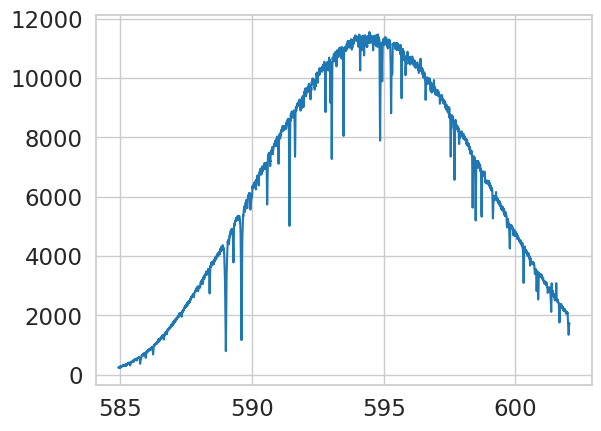

In [3]:
%matplotlib inline
plt.plot(wave,flux)
plt.show()

Text(0, 0.5, 'Flux (counts)')

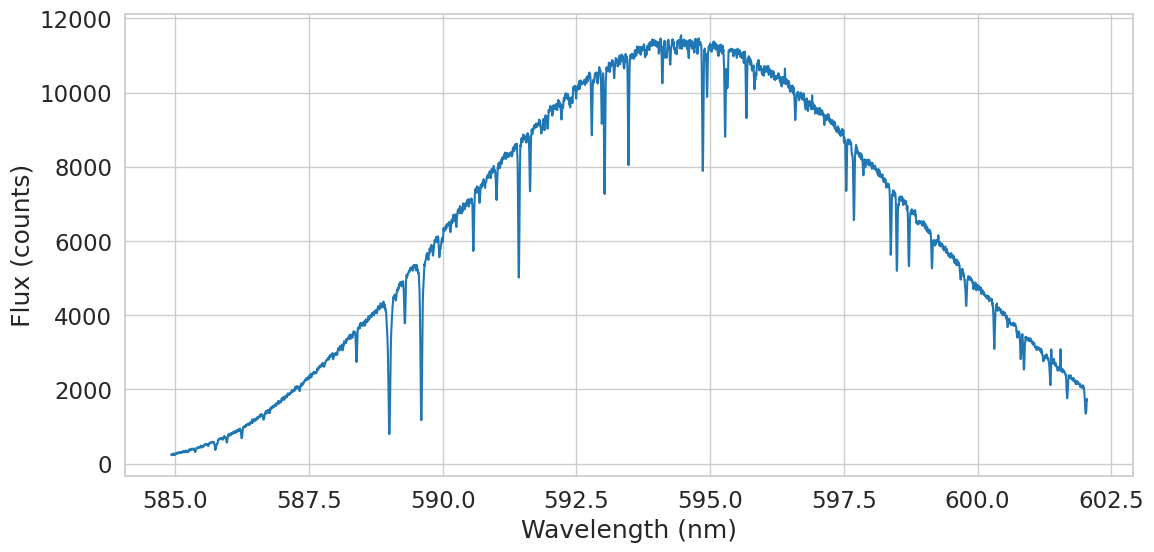

In [4]:
# Read in the data from a text file
# wave, flux = np.loadtxt('../data/sample_data.dat', usecols=(0, 1), unpack=True)

# Convert into the structure that telfit wants
data = telfit.DataStructures.xypoint(x=wave, y=flux)

fig, ax = plt.subplots(1, 1, figsize=(13, 6))
ax.plot(data.x, data.y)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (counts)')

In [5]:
# Instantiate the fitter class
fitter = telfit.TelluricFitter()

# Set the observatory. McDonald and a few others are available by name.
observatory = {"latitude": 32,
                  "altitude": 4.5}
fitter.SetObservatory(observatory)

#The following are parameters that should be in the fits header for an observation
angle = 30  #Zenith distance
pressure = 950  #Pressure, in hPa
humidity = 35.0  #Percent humidity, at the observatory altitude
temperature = 290.5  #Temperature in Kelvin
resolution = 30000.0  #Resolution lambda/delta-lambda


    #Define variables to be fit, and give initial guesses.
    # We will just fit the relative humidity in this example.
fitter.FitVariable({"h2o": humidity})

    #Adjust parameters that will not be fit, but are important
fitter.AdjustValue({"angle": angle,
                        "pressure": pressure,
                        "temperature": temperature,
                        "resolution": resolution,
                        "wavestart": data.x[0] - 20.0,
                        "waveend": data.x[-1] + 20.0,
                        "o2": 2.12e5})

fitter.SetBounds(dict(h2o=(1, 99), resolution=(25000, 35000)))

In [6]:
# Finally, perform the fit
model = fitter.Fit(data=data,                   # The data to fit
                           resolution_fit_mode='gauss',   # This is best for IGRINS data. The other option is 'gauss'
                           adjust_wave='data')            

Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.15system 0:01.82elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+604760outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.62user 1.19system 0:01.82elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+604728outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.50000E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.69user 1.10system 0:01.80elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+604744outputs (0major+1103minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.96545E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.18system 0:01.83elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+604728outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.87460E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.21system 0:01.84elapsed 100%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+604728outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.52025E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.67user 1.22system 0:01.90elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+604744outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31918E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.17system 0:01.80elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575176outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.11065E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.19system 0:01.83elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+604712outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	1.81501E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.61user 1.14system 0:01.76elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575272outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.12791E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.70user 1.07system 0:01.77elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575176outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.27737E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.60user 1.19system 0:01.79elapsed 100%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575176outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31243E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.20system 0:01.86elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575192outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31851E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.58user 1.15system 0:01.74elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575192outputs (0major+1101minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31912E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.63user 1.12system 0:01.76elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575224outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31918E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.66user 1.17system 0:01.84elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575200outputs (0major+1102minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31918E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.14system 0:01.80elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575176outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	3.11065E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.18system 0:01.83elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+604712outputs (0major+1099minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31918E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.64user 1.12system 0:01.76elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575176outputs (0major+1098minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31918E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.09system 0:01.75elapsed 99%CPU (0avgtext+0avgdata 8064maxresident)k
0inputs+575176outputs (0major+1100minor)pagefaults 0swaps


Parameter      	Value		Fitting?	Bounds
-------------	-----		-----		-----
h2o            	2.31918E+01	True		1 - 99

Running exec: lblrtm




Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
STOP  LBLRTM EXIT 
0.65user 1.16system 0:01.81elapsed 99%CPU (0avgtext+0avgdata 7936maxresident)k
0inputs+575192outputs (0major+1098minor)pagefaults 0swaps


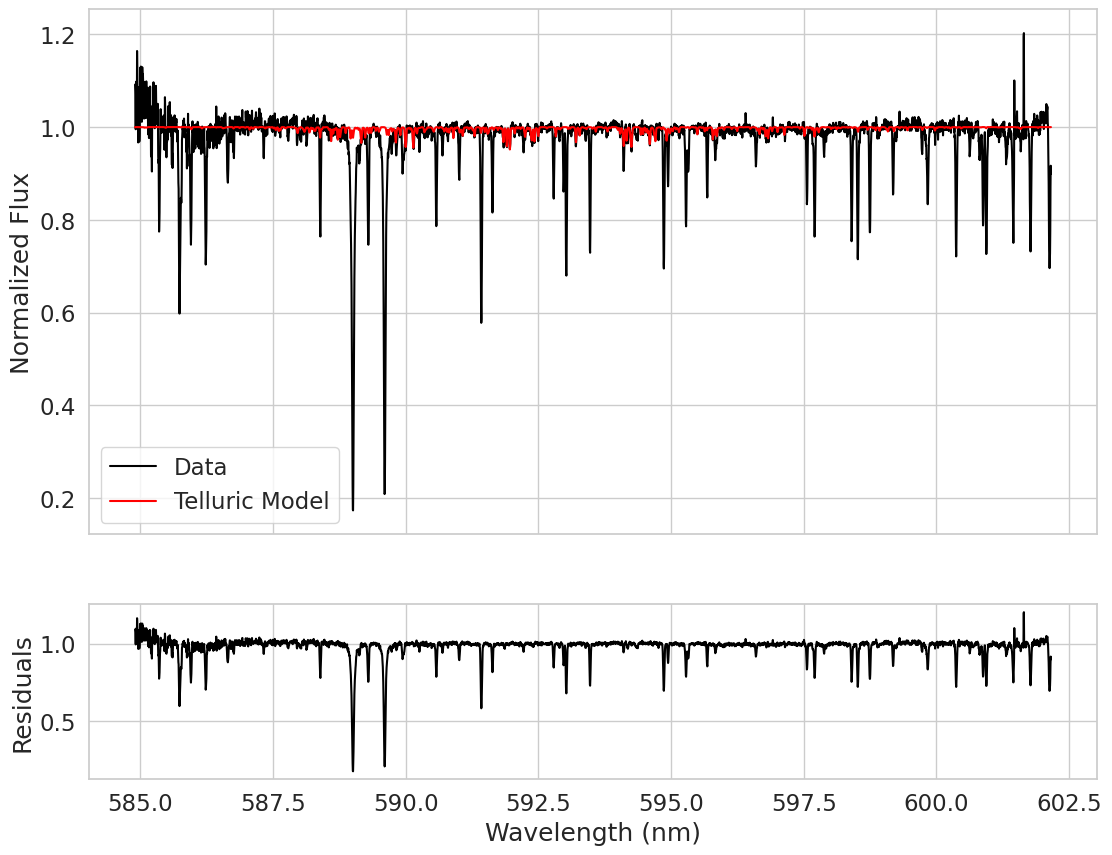

In [7]:
%matplotlib inline
# Get the new data (it has an updated wavelength axis)
newdata = fitter.data

fig, (top, bottom) = plt.subplots(2, 1, sharex=True, figsize=(13, 10), 
                                  gridspec_kw=dict(height_ratios=(3,1)))

top.plot(newdata.x, newdata.y/newdata.cont, 'k-', label='Data')
top.plot(model.x, model.y, 'r-', label='Telluric Model')
bottom.plot(newdata.x, newdata.y/newdata.cont / model.y, 'k-')


bottom.set_xlabel('Wavelength (nm)')
bottom.set_ylabel('Residuals')
top.set_ylabel('Normalized Flux')

leg = top.legend(loc='best', fancybox=True)

#Save the best-fit model spectrum
np.savetxt("Model.dat", np.transpose((model.x, model.y)), fmt="%.8g")
np.savetxt("target.dat", np.transpose((newdata.x, newdata.y,newdata.cont)), fmt="%.8g")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.loadtxt("Model.dat")
y = np.loadtxt("target.dat")
x = np.transpose(x)
y = np.transpose(y)

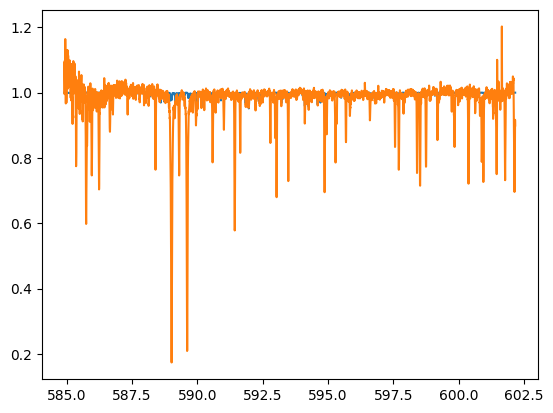

In [2]:
%matplotlib inline
plt.plot(x[0],x[1])
plt.plot(y[0],y[1]/y[2])
plt.show()

In [4]:
# %matplotlib qt5
# plt.plot(x[0],x[1])
# plt.plot(y[0],y[1]/y[2])
# plt.plot(y[0],(y[1]/(x[1]*y[2]))-0.8)

In [30]:
newdata_x = y[0]
newdata_y = y[1]
newdata_cont = y[2]
model_x = x[0]
model_y = x[1]